In [ ]:
# probleme du facteur chinois en python 

# probléme voyageur de commerce : trouver l'itinéraire le plus court 
# Le problème de tournées de véhicules avec capacité (CVRP) 
# pour le problemme on deffinit

# numéro de client (plus un dépôt)
# numéro de véhicule  
# demande de chaque client : valeurs aléatoires  
# capacité du véhicule :(en supposant que tous les véhicules ont la même capacité)


# model a utilisé 
# G = (V . E) : un graph (de preferance hamiltonien) qui montre la localisation et la route des clients
# V={0,1,....,n} : une collection de noeuds , == O : depot des vehicules , >= 1 : clients
# E : liens entre chaque noeuds Eij(i, j)
# K = {1,2,...,k} : liste des vehicules 
# Di >= 0 : demandes des clients i 
# Q>=0 : capacité maximale du vehicule (la méme pour toutes les voitures)
# Cij : poid de la distance entre i et j (distance entre Ni et Nj)
# Tij : trafic entre i et j (dense , moyen , rapide)


# variable de decision
# X (k , i , j) = boolean

# objectif 
# minimiser la sum du coup de voyages (distance et trafic du voyage) de tout les vehicules

# contraintes 
# depot (depart arrivé)
# la capacité delivrable de chaque vehicule doit etre <= la taille maximum Q
# un client ne doit etre livré que par un seule vehicule 

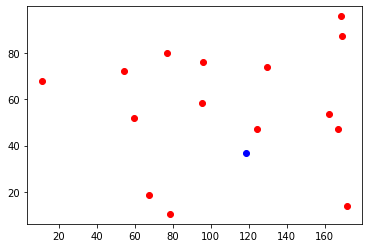

In [19]:
import random
# import itertools
# import copy
import networkx as nx
# import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import math


# nombre de clients clients_count §check
# nombre de voiture disponible vehicules_count §checj
# (opt) quantité max de la voiture vehicules_cty §check
# (opt) quantité qui doit etre livré aux clients clients_qty §check 
# nombre de noeuds nodes_count §check noeuds === client
# liste des arcs arcs_count §check
# lat lng pour chaque noeud node_position : {lat , long} §check
# trafic pour chaque arc arc_trafic{t: "dense" , "normale" , "fluide"} §check
# distance pour chaque arc arc_distance : {distance} calculé par trigonométrie §check Hypothenus
# coup pour chaque arc arc_cost : {cost} !!!!!A COMPLETER 
# default position vehiucules depot_position  §check
# plage horraire pour chaque vehicule !!!! A COMPLETER


rnd = np.random # random helper
rnd.seed(0)
 
clients_count = rnd.randint(3,20) # nombre de clients hamiltonien >= 3 

xc = rnd.rand(clients_count+1)*200 # random number in list (positions gps)
yc = rnd.rand(clients_count+1)*100 

nodes_lat = xc[1:] #liste latitude client
nodes_long = yc[1:] #liste longitude client
depot_lat = xc[0] # latitude depot des voitures
depot_long = yc[0] # longitude depot des voitures


plt.plot(depot_lat , depot_long , c="b" , marker="o") # afficher le point depart
plt.scatter(nodes_lat , nodes_long , c="r" , marker="o") # afficher le reste des noeuds 

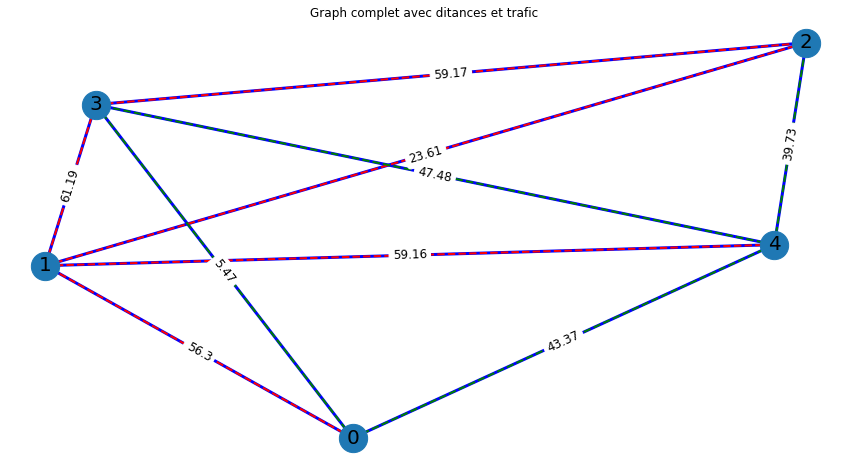

In [8]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
 
    
rnd = np.random # random helper
rnd.seed(0)
 
clients_count = 5 # nombre de clients hamiltonien >= 3 

min_d = math.ceil(clients_count/2) # degre min
max_d = clients_count-1 # degre max

xc = rnd.rand(clients_count+1)*200 # random number in list (positions gps)
yc = rnd.rand(clients_count+1)*100 

nodes_lat = xc[1:] #liste latitude client
nodes_long = yc[1:] #liste longitude client
depot_lat = xc[0] # latitude depot des voitures
depot_long = yc[0] # longitude depot des voitures


# plt.plot(depot_lat , depot_long , c="b" , marker="o") # afficher le point depart
# plt.scatter(nodes_lat , nodes_long , c="r" , marker="o") # afficher le reste des noeuds 

N = [i for i in range(1 , clients_count+1)] # liste des clients 
V = [i for i in range(clients_count)]# liste de sommets clients + depot 
A = [(i,j) for i in V for j in V if i!=j] # liste d'arcs complet
D = {(i,j) : np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i,j in A } # distance entre deux points equivalent a sqrt(x1**2 + x2**2) 
T = {(i,j) : random.choice(['f','d']) for i,j in A } # trafic entre deux points fluide , danse 
# C = COUP TOTAL A COMPLETER !!!
vehicules_count = rnd.randint(3,8) # nombre de vehicule  !!! A IMPLEMENTER
vehicules_cty = rnd.randint(20,50) # capacité du vehicule !!! A IMPLEMENTER
clients_qty = {i: rnd.randint(1,50) for i in N} # quantité a livré  !!! A IMPLEMENTER



G = nx.Graph() # graph init
# V_mutation = [(i , {'lat' : str(xc[i]) , 'long' : str(yc[i]) }) for i in V] # mutation de donnés sous format (idx_node , lat , long)
# G.add_nodes_from(V_mutation) # creation des noeuds 
# A_mutation = [( str(i) , str(j) , {'weight' : round(np.hypot(xc[i]-xc[j], yc[i]-yc[j]) , 2) , 'trafic' : random.choice(['f','d']) } ) for i,j in A ] # matrice complete 
# A_new = [(i,j) for i in V for j in V[3:random.randrange(math.ceil(len(V)/2),len(V))] if i!=j] # liste d'arcs 
# A_mutation_hamiltonien = [( str(i) , str(j) , {'weight' : round(np.hypot(xc[i]-xc[j], yc[i]-yc[j]) , 2) , 'trafic' : random.choice(['f','d']) } ) for i,j in A_new ] # matrice hamiltonienne


A_hamiltonien = [] 

def deg(s):
    deg = 0
    for n in A_hamiltonien:
        if(n[0] == s or n[1] == s):
            deg = deg + 1
    return deg

def arr(s1, s2):
    for i in A_hamiltonien:
        if(i[0] == s2 and i[1] == s1):
            return True
    return False


for i in V : 
    deg_rand = random.randrange(min_d , max_d + 1)
    deg_actu = deg(i)
    while (deg_actu < deg_rand) :
        sommet = random.randrange(0, len(V))
        if(sommet != i):
            if(deg(sommet) < max_d and not arr(i, sommet) and not arr(sommet, i)):
                deg_actu = deg_actu + 1
                A_hamiltonien.append((i, sommet))
                arr(i, sommet)



A_mutation_hamiltonien = [( str(i) , str(j) , {'weight' : round(np.hypot(xc[i]-xc[j], yc[i]-yc[j]) , 2) , 'trafic' : random.choice(['f','d']) } ) for i,j in A_hamiltonien ] # matrice hamiltonienne

G.add_edges_from(A_mutation_hamiltonien) # arcs init


# splitting edges 
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 50]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 90.5]
dense = [(u, v) for (u, v, d) in G.edges(data=True) if d["trafic"] == "d"]
fluid = [(u, v) for (u, v, d) in G.edges(data=True) if d["trafic"] == "f"]

pos = nx.spring_layout(G)  # positionement des sommets 

plt.figure(figsize=(15, 8))
plt.title('Graph complet avec ditances et trafic ')


# nodes
nx.draw_networkx_nodes(G, pos, node_size=800) 

# edges
nx.draw_networkx_edges(
    G, pos, edgelist=elarge, width=3 , alpha=1, edge_color="orange" 
)
    
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=3, alpha=1, edge_color="blue" 
)
nx.draw_networkx_edges(
    G, pos, edgelist=dense, width=2, alpha=1, edge_color="red" , style="dashed"
)
nx.draw_networkx_edges(
    G, pos, edgelist=fluid, width=2, alpha=1, edge_color="green" , style="dashed"  
)

#get attributes 
edge_labels_w = nx.get_edge_attributes(G, 'weight')
edge_labels_t = nx.get_edge_attributes(G, 'trafic')


# labels
nx.draw_networkx_edge_labels(G , pos , edge_labels=edge_labels_w  ,font_size=12 )
# nx.draw_networkx_edge_labels(G , pos , edge_labels=edge_labels_t  ,font_size=12 )

nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif"  )

plt.axis("off")
plt.show()

 


In [9]:
A_mutation_hamiltonien

[('0', '1', {'weight': 56.3, 'trafic': 'd'}),
 ('0', '4', {'weight': 43.37, 'trafic': 'f'}),
 ('0', '3', {'weight': 5.47, 'trafic': 'f'}),
 ('1', '4', {'weight': 59.16, 'trafic': 'd'}),
 ('1', '3', {'weight': 61.19, 'trafic': 'd'}),
 ('1', '2', {'weight': 23.61, 'trafic': 'd'}),
 ('2', '3', {'weight': 59.17, 'trafic': 'd'}),
 ('2', '4', {'weight': 39.73, 'trafic': 'f'}),
 ('3', '4', {'weight': 47.48, 'trafic': 'f'})]